In [2]:
import os
import scanpy as sc
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base = '../save/adata/GSE140440/'
files = [f for f in os.listdir(base) if os.path.isfile(os.path.join(base, f))]

print(files)

['GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.01_mod_new_sam_upsampling_seed_50.h5ad', 'GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_upsampling_seed_5.h5ad', 'GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_upsampling_seed_90.h5ad', 'GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.01_mod_new_sam_upsampling_seed_10.h5ad', 'GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_upsampling_seed_50.h5ad', 'GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_upsampling_seed_100.h5ad', 'GSE140440integrate_dat

In [4]:
for filename in files:
    print(filename)
    adata = sc.read_h5ad(base + filename)
    
    sens_gt = grouth_truth = adata.obs['sensitive']
    sens_pred = adata.obs["sens_label"]

    print(classification_report(sens_gt, sens_pred))

GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.01_mod_new_sam_upsampling_seed_50.h5ad
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       162
           1       0.61      0.59      0.60       162

    accuracy                           0.60       324
   macro avg       0.60      0.60      0.60       324
weighted avg       0.60      0.60      0.60       324

GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_upsampling_seed_5.h5ad
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       162
           1       0.77      0.60      0.68       162

    accuracy                           0.71       324
   macro avg       0.72      0.71      0.71       324
weighted avg       0.72      0.71      0.71       324

GSE140440integrate_data_GSE1

In [5]:
# Comparison of models with and without variance loss

metric_keys = ["F1", "AUROC", "AP"]
variance_types = ["MMD with Variance", "MMD without Variance"]
data_keys = [f"Data {i}" for i in range(1, 7)]

results = {
    data: {variance: {metric: [] for metric in metric_keys} for variance in variance_types}
    for data in data_keys
}

for filename in files:
    print(filename)
    adata = sc.read_h5ad(base + filename)
    #print(adata.obs)
    
    true = adata.obs['sensitive']
    pred = adata.obs["sens_label"]

    report = classification_report(sens_gt, sens_pred)
    f1 = f1_score(true, pred)
    auroc = roc_auc_score(true, pred)
    ap = average_precision_score(true, pred)

    print(f"F1: {f1}")
    print(f"AUROC: {auroc}")
    print(f"AP: {ap}")
    print()

# F1


# AUROC


# AP

GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.01_mod_new_sam_upsampling_seed_50.h5ad
F1: 0.5956112852664577
AUROC: 0.6018518518518519
AP: 0.5616301014390186

GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_upsampling_seed_5.h5ad
F1: 0.6782006920415224
AUROC: 0.712962962962963
AP: 0.6643336249635462

GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.25_gene_F_lr_0.01_mod_new_sam_upsampling_seed_90.h5ad
F1: 0.3949044585987261
AUROC: 0.4135802469135802
AP: 0.4647498375568551

GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_DAE_dropout_0.1_gene_F_lr_0.01_mod_new_sam_upsampling_seed_10.h5ad
F1: 0.7545787545787546
AUROC: 0.79320987654321
AP: 0.7720776331887442

GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_p

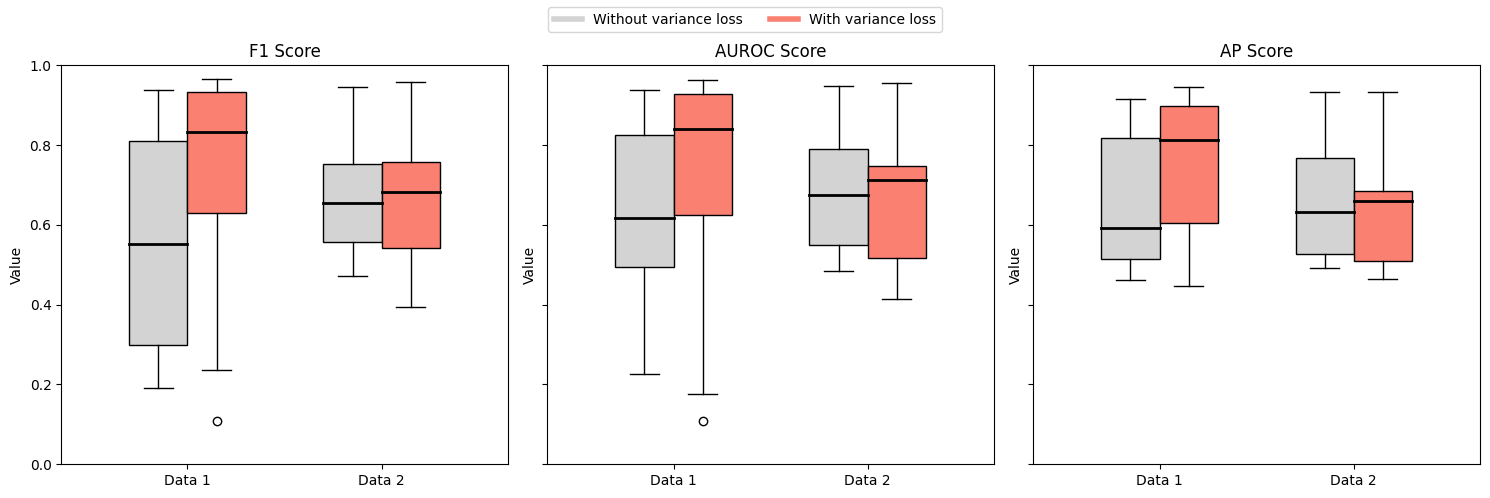

In [6]:
base_dir = '../save/adata/'
datasets = ["GSE110894", "GSE140440"]
dataset_mapping = {dataset: f"Data {i + 1}" for i, dataset in enumerate(datasets)}

metric_keys = ["F1", "AUROC", "AP"]
variance_types = ["Without variance loss", "With variance loss"]

results = {
    dataset_mapping[dataset]: {variance: {metric: [] for metric in metric_keys} for variance in variance_types}
    for dataset in datasets
}

for dataset in datasets:
    base = os.path.join(base_dir, dataset)
    files = [f for f in os.listdir(base) if os.path.isfile(os.path.join(base, f))]
    
    for filename in files:
        filepath = os.path.join(base, filename)
        adata = sc.read_h5ad(filepath)
        
        true = adata.obs['sensitive']
        pred = adata.obs["sens_label"]
        
        f1 = f1_score(true, pred)
        auroc = roc_auc_score(true, pred)
        ap = average_precision_score(true, pred)

        if 'dropout_0.1' in filename:
            variance_type = "Without variance loss"
        elif 'dropout_0.25' in filename:
            variance_type = "With variance loss"
        else:
            continue

        results[dataset_mapping[dataset]][variance_type]["F1"].append(f1)
        results[dataset_mapping[dataset]][variance_type]["AUROC"].append(auroc)
        results[dataset_mapping[dataset]][variance_type]["AP"].append(ap)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

metrics = ["F1", "AUROC", "AP"]
medianprops = dict(color='black', linewidth=2)

for i, (ax, metric) in enumerate(zip(axs, metrics)):
    data_without_transfer = [results[dataset][variance_types[0]][metric] for dataset in dataset_mapping.values()]
    data_with_transfer = [results[dataset][variance_types[1]][metric] for dataset in dataset_mapping.values()]

    ax.boxplot(data_without_transfer, positions=np.arange(len(datasets)) - 0.15, widths=0.3, patch_artist=True, 
               boxprops=dict(facecolor='lightgray'), medianprops=medianprops, labels=dataset_mapping.values())
    ax.boxplot(data_with_transfer, positions=np.arange(len(datasets)) + 0.15, widths=0.3, patch_artist=True, 
               boxprops=dict(facecolor='salmon'), medianprops=medianprops, labels=dataset_mapping.values())

    ax.set_title(f'{metric} Score')
    ax.set_xticks(np.arange(len(datasets)))
    ax.set_xticklabels(dataset_mapping.values())
    ax.set_ylim([0, 1])
    ax.set_ylabel('Value')

handles = [plt.Line2D([0], [0], color='lightgray', lw=4, label='Without variance loss'),
           plt.Line2D([0], [0], color='salmon', lw=4, label='With variance loss')]
fig.legend(handles=handles, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()